In [3]:
# Import Dependencies
import requests
import json
import csv
import os
import pandas as pd
import gmaps
import gmaps.geojson_geometries

In [4]:
#Loading the County and State geo_json geometry files
counties_geojson = gmaps.geojson_geometries.load_geometry('us-counties')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')
#Set the fig object
fig = gmaps.figure()
#Set the mortality layer as the data point to determine depth of color in chloropleth
mortality_layer = gmaps.geojson_layer(counties_geojson)
#Add mortality layer to fig object
fig.add_layer(mortality_layer)

In [5]:
#Initialize state code and name array. This will then be used to create a state code and name mapping dictionary
state_cd = []
state_name = []
for i in range(len(states_geojson['features'])):
    state_cd.append(states_geojson['features'][i]['properties']['STATE'])
    state_name.append(states_geojson['features'][i]['properties']['NAME'])
state_cd = zip(state_cd,state_name)
state_dict = dict(state_cd)

In [6]:
#Import the cleaned up County Data csv
county_df = pd.read_csv('Data/CleanedCounty.csv')
#Index the County
indexed_df = county_df.set_index('County')

In [7]:
#Using the Plasma color scheme assign color values (in hex) to mortality
from matplotlib.cm import plasma
from matplotlib.colors import to_hex
min_mortality = indexed_df["Mortality"].min()
max_mortality = indexed_df["Mortality"].max()
mortality_range = max_mortality - min_mortality
def calculate_color(mortality):
    normalized_mortality = (mortality - min_mortality) / mortality_range
    inverse_mortality = 1.0 - normalized_mortality
    mpl_color = plasma(inverse_mortality)
    gmaps_color = to_hex(mpl_color, keep_alpha=False)
    return gmaps_color
max_mortality

967.18

In [8]:
year = int(input("Choose a year among 1980/ 1985/ 1990/ 1995/ 2000/ 2005/ 2010/ 2014 : "))
map_df = indexed_df.loc[indexed_df["Year"]==year]

Choose a year among 1980/ 1985/ 1990/ 1995/ 2000/ 2005/ 2010/ 2014 : 1980


In [9]:
colors = []
counties_not_found = []
county_state = []
for feature in counties_geojson['features']:
    county_name = feature['properties']['NAME']
    state_cd = feature['properties']['STATE']   
    state_name = state_dict[state_cd]
    county_state_name = county_name+", "+state_name
    county_state.append(county_state_name)
    try:
        mortality = map_df.loc[county_state_name, "Mortality"]
        color = calculate_color(mortality)
    except KeyError:
        counties_not_found.append(county_state_name)
        color = (0, 0, 0, 0.3)
    colors.append(color)
cnf_df = pd.DataFrame(counties_not_found)
cnf_df.to_excel('Data/cnf.xls')
#county_state_df = pd.DataFrame(county_state)

In [20]:
figure_layout = {
    'width': '1200px',
    'height': '1000px',
    'border': '1px solid black',
    'padding': '1px'
}
fig = gmaps.figure(layout=figure_layout)
mortality_layer = gmaps.geojson_layer(
    counties_geojson,
    fill_color=colors,
    stroke_color=colors,
    fill_opacity=0.8)
fig.add_layer(mortality_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='1000px', padding='1px', width='1200px'))

In [21]:
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')
#Set the fig object
fig = gmaps.figure()
#Set the mortality layer as the data point to determine depth of color in chloropleth
mortality_layer = gmaps.geojson_layer(states_geojson)
#Add mortality layer to fig object
fig.add_layer(mortality_layer)

In [22]:
#Import the cleaned up State Data csv
state_df = pd.read_csv("Data/CleanedState.csv")
#Index the State
indexed_df = state_df.set_index("State")
year = int(input("Choose a year among 1980/ 1985/ 1990/ 1995/ 2000/ 2005/ 2010/ 2014 : "))
map_df = indexed_df.loc[indexed_df["Year"]==year]

Choose a year among 1980/ 1985/ 1990/ 1995/ 2000/ 2005/ 2010/ 2014 : 1990


In [23]:
from matplotlib.cm import plasma
from matplotlib.colors import to_hex
min_mortality = indexed_df["Mortality"].min()
max_mortality = indexed_df["Mortality"].max()
mortality_range = max_mortality - min_mortality
def calculate_color(mortality):
    normalized_mortality = (mortality - min_mortality) / mortality_range
    inverse_mortality = 1.0 - normalized_mortality
    mpl_color = plasma(inverse_mortality)
    gmaps_color = to_hex(mpl_color, keep_alpha=False)
    return gmaps_color

In [24]:
colors = []
for feature in states_geojson['features']:
    state_name = feature['properties']['NAME']
    try:
        mortality = map_df.loc[state_name, "Mortality"]
        color = calculate_color(mortality)
    except KeyError:
        color = (0, 0, 0, 0.3)
    colors.append(color)

In [25]:
figure_layout = {
    'width': '1200px',
    'height': '1000px',
    'border': '1px solid black',
    'padding': '1px'
}
fig = gmaps.figure(layout=figure_layout)
mortality_layer = gmaps.geojson_layer(
    states_geojson,
    fill_color=colors,
    stroke_color=colors,
    fill_opacity=0.8)
fig.add_layer(mortality_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='1000px', padding='1px', width='1200px'))

In [27]:
input_df = pd.read_csv("Data/StateFlat.csv")
input_df = input_df[['State','1980','1985','1990','1995','2000','2005','2010','2014']]
us_state_code_df = pd.read_csv('Data/US State Codes.csv')
input_merge_df = pd.merge(input_df,us_state_code_df, on='State')
input_merge_df_clean = input_merge_df [['Code','1980','1985','1990','1995','2000','2005','2010','2014']]
input_merge_df_clean.head()
input_merge_df_clean = input_merge_df_clean.set_index('Code')
input_merge_df_clean = input_merge_df_clean.drop("AK", axis=0)
set1 = input_merge_df_clean.iloc[:10]
set2 = input_merge_df_clean.iloc[10:20]
set3 = input_merge_df_clean.iloc[20:30]
set4 = input_merge_df_clean.iloc[30:40]
set5 = input_merge_df_clean.iloc[40:50]
states = input_merge_df['Code'].tolist()
states.remove('AK')
states1 = states[:10]
states2 = states[10:20]
states3 = states[20:30]
states4 = states[30:40]
states5 = states[40:50]

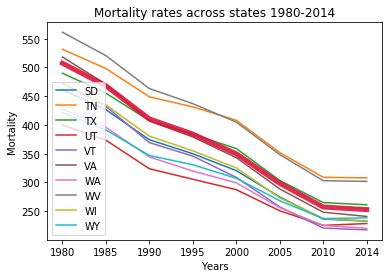

In [31]:
import matplotlib.pyplot as plt
years = list(input_df.columns)
years = years[1:]

i=0
for state in states5:
    state = set5.iloc[i]
    i= i+1
    plt.plot(years, state,label=state.name)
    plt.legend(loc='lower left')
    
    #plt.text(10.2, 4, state, horizontalalignment='left', size='small', color='orange')
us=[507.37,468.10,410.43,384.09,349.75,298.31,257.23,252.70]
plt.plot(years,us,linewidth=5.0, alpha=0.9, color='crimson', label = 'US')
#plt.text(10.2, 'Mr Orange', size='small', color='orange')
plt.title ('Mortality rates across states 1980-2014')
plt.xlabel ('Years')
plt.ylabel ('Mortality')
plt.savefig('Output/Set5.png',dpi=1000)